# Session 10 Cluster Analysis | Exercise & Solution


[**CCMVI2085U Machine Learning for Predictive Analytics in Business @ CBS ISUP 2020**](https://kursuskatalog.cbs.dk/2019-2020/KAN-CCMVI2085U.aspx?lang=en-GB)

Course coordinator: [Bowei Chen](https://boweichen.github.io/) | Email: [bc.acc@cbs.dk](mailto:bc.acc@cbs.dk)

-----

In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Project:-fashion-mnist-classification" data-toc-modified-id="Project:-fashion-mnist-classification-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Project: fashion mnist classification</a></span></li><li><span><a href="#Solution" data-toc-modified-id="Solution-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Solution</a></span><ul class="toc-item"><li><span><a href="#Load-dataset" data-toc-modified-id="Load-dataset-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Load dataset</a></span></li><li><span><a href="#Scale-features" data-toc-modified-id="Scale-features-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Scale features</a></span></li><li><span><a href="#Solution-to-Q1" data-toc-modified-id="Solution-to-Q1-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Solution to Q1</a></span></li><li><span><a href="#Solution-to-Q2" data-toc-modified-id="Solution-to-Q2-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Solution to Q2</a></span></li><li><span><a href="#Solution-to-Q3" data-toc-modified-id="Solution-to-Q3-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Solution to Q3</a></span></li></ul></li></ul></div>

## Project: fashion mnist classification

Context Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Zalando intends Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.

The original MNIST dataset contains a lot of handwritten digits. Members of the AI/ML/Data Science community love this dataset and use it as a benchmark to validate their algorithms. In fact, MNIST is often the first dataset researchers try. "If it doesn't work on MNIST, it won't work at all", they said. "Well, if it does work on MNIST, it may still fail on others."

Zalando seeks to replace the original MNIST dataset

Content
Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. The training and test data sets have 785 columns. The first column consists of the class labels (see above), and represents the article of clothing. The rest of the columns contain the pixel-values of the associated image.

To locate a pixel on the image, suppose that we have decomposed x as x = i * 28 + j, where i and j are integers between 0 and 27. The pixel is located on row i and column j of a 28 x 28 matrix.
For example, pixel31 indicates the pixel that is in the fourth column from the left, and the second row from the top, as in the ascii-diagram below.


Labels

Each training and test example is assigned to one of the following labels:

0 T-shirt/top
1 Trouser
2 Pullover
3 Dress
4 Coat
5 Sandal
6 Shirt
7 Sneaker
8 Bag
9 Ankle boot


TL;DR

Each row is a separate image
Column 1 is the class label.
Remaining columns are pixel numbers (784 total).
Each value is the darkness of the pixel (1 to 255)

**Task**

1. We withhold label and implement the K-means clustering to divide the feature data into 10 groups
2. Can you used the cluters to analyse what kind of instances that each cluster represent?
3. We then use the withheld label to evalulate the performance of the clustering


## Solution

### Load dataset

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv("data/Fashion_Mnist.csv")

# Assign category names to the label/response variable.
label_map = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot",
}

df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<IPython.core.display.Javascript object>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 29.9 MB


<IPython.core.display.Javascript object>

In [4]:
import matplotlib.pyplot as plt

xx = df.iloc[0, 1:].to_numpy().reshape(28, 28)
plt.imshow(xx, cmap="Greys")

<IPython.core.display.Javascript object>

### Scale features 

In [5]:
from sklearn.preprocessing import StandardScaler

x = df.iloc[:, 1:].to_numpy()
y = df.iloc[:, 0].to_numpy().flatten()

ss = StandardScaler().fit(x)
x = ss.transform(x)
print(x)

[[-0.01414355 -0.03192522 -0.09155168 ... -0.16401084 -0.09013093
  -0.0327934 ]
 [-0.01414355 -0.03192522 -0.09155168 ... -0.16401084 -0.09013093
  -0.0327934 ]
 [-0.01414355 -0.03192522 -0.09155168 ... -0.16401084 -0.09013093
  -0.0327934 ]
 ...
 [-0.01414355 -0.03192522 -0.09155168 ... -0.16401084 -0.09013093
  -0.0327934 ]
 [-0.01414355 -0.03192522 -0.09155168 ... -0.16401084 -0.09013093
  -0.0327934 ]
 [-0.01414355 -0.03192522 -0.09155168 ...  2.42966992 -0.09013093
  -0.0327934 ]]


<IPython.core.display.Javascript object>

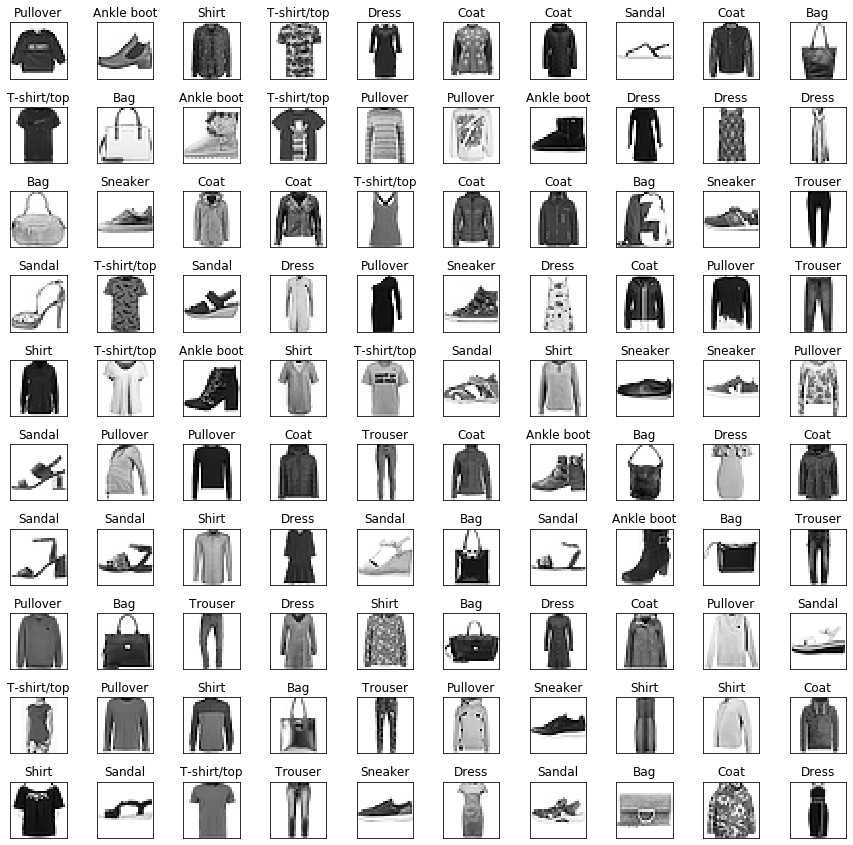

<IPython.core.display.Javascript object>

In [6]:
import numpy as np

# How many images to display.
numbers_to_display = 100

# Calculate the number of cells that will hold all the images.
num_cells = np.ceil(np.sqrt(numbers_to_display))

# Make the plot a little bit bigger than default one.
fig = plt.figure(figsize=(15, 15))

# Go through the first images in a training set and plot them.
for plot_index in range(numbers_to_display):
    # Extract image data.
    digit = df[plot_index : plot_index + 1].values
    digit_label = digit[0][0]
    digit_pixels = digit[0][1:]

    # Calculate image size (remember that each picture has square proportions).
    image_size = int(np.sqrt(digit_pixels.shape[0]))

    # Convert image vector into the matrix of pixels.
    frame = digit_pixels.reshape((image_size, image_size))

    # Plot the image matrix.
    plt.subplot(num_cells, num_cells, plot_index + 1)
    plt.imshow(frame, cmap="Greys")
    plt.title(label_map[digit_label])
    plt.tick_params(
        axis="both",
        which="both",
        bottom=False,
        left=False,
        labelbottom=False,
        labelleft=False,
    )

# Plot all subplots.
plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()

### Solution to Q1

In [7]:
from sklearn.cluster import KMeans

num_clusters = 10

kmeans = KMeans(init="k-means++", n_clusters=num_clusters, random_state=99)
kmeans.fit(x)

y_pred = kmeans.predict(x)

<IPython.core.display.Javascript object>

### Solution to Q2 

In [8]:
import numpy as np


def plot_fig(numbers_to_display, x_ndarray):

    # Calculate the number of cells that will hold all the images.
    num_cells = np.ceil(np.sqrt(numbers_to_display))

    # Make the plot a little bit bigger than default one.
    fig = plt.figure(figsize=(10, 10))

    # Go through the first images in a training set and plot them.
    for plot_index in range(numbers_to_display):

        # Extract image data.
        digit_pixels = x_ndarray[plot_index]

        # Calculate image size (remember that each picture has square proportions).
        image_size = int(np.sqrt(digit_pixels.shape[0]))

        # Convert image vector into the matrix of pixels.
        frame = digit_pixels.reshape((image_size, image_size))

        # Plot the image matrix.
        plt.subplot(num_cells, num_cells, plot_index + 1)
        plt.imshow(frame, cmap="Greys")
        plt.tick_params(
            axis="both",
            which="both",
            bottom=False,
            left=False,
            labelbottom=False,
            labelleft=False,
        )

    # Plot all subplots.
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    plt.show()

<IPython.core.display.Javascript object>

 Predicted label: 0



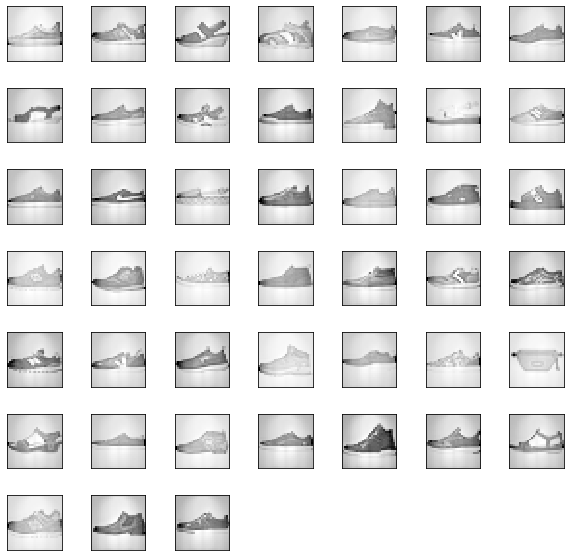



 Predicted label: 1



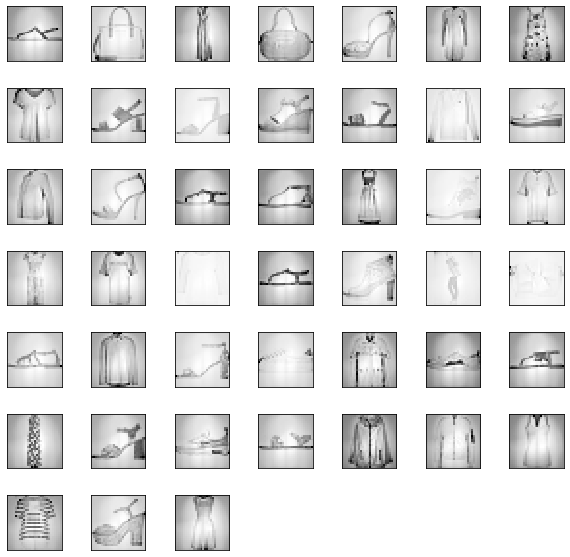



 Predicted label: 2



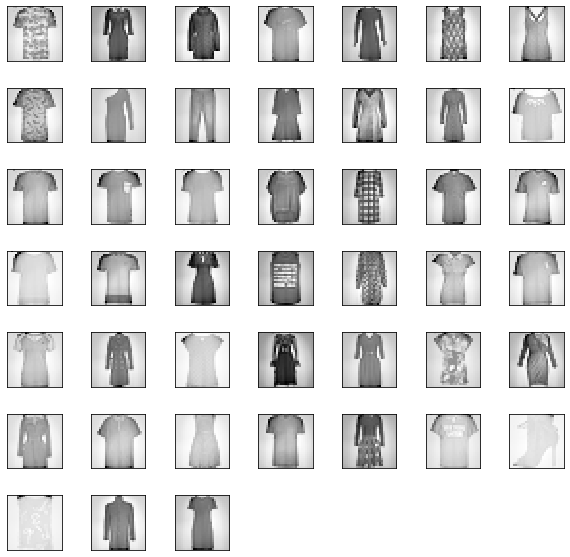



 Predicted label: 3



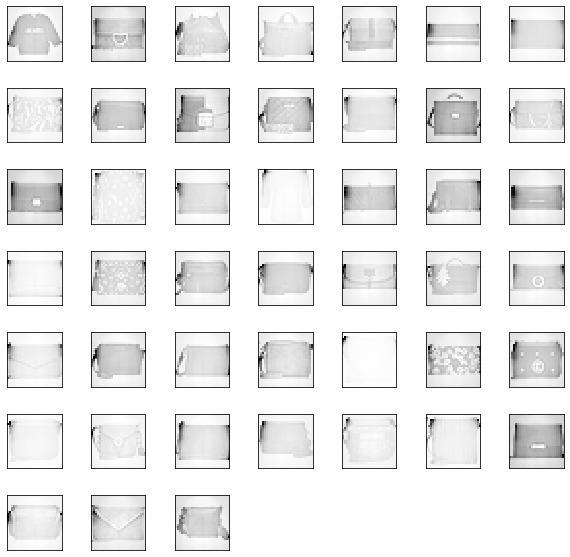



 Predicted label: 4



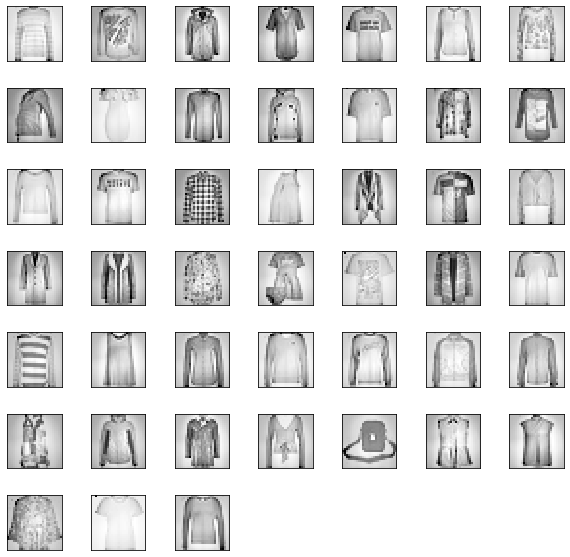



 Predicted label: 5



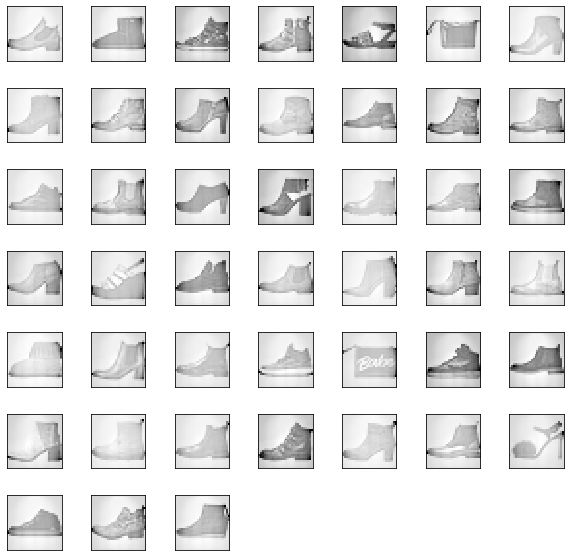



 Predicted label: 6



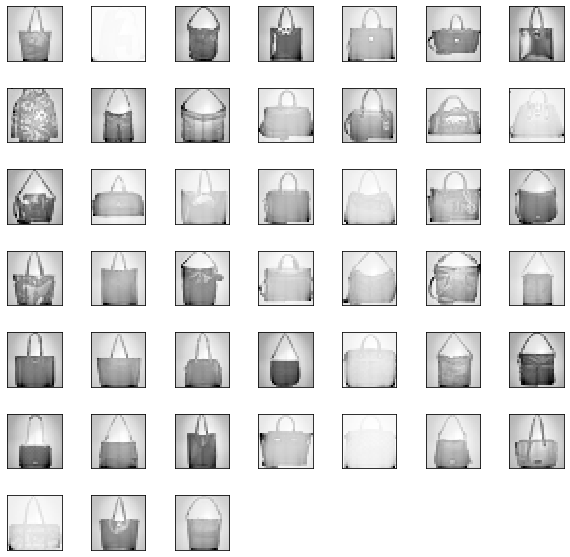



 Predicted label: 7



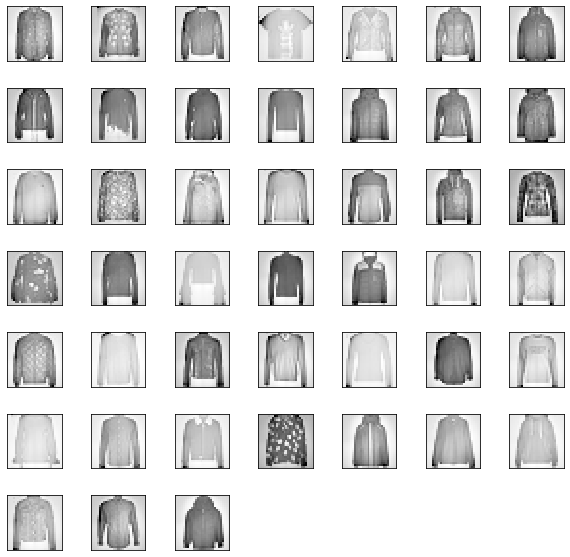



 Predicted label: 8



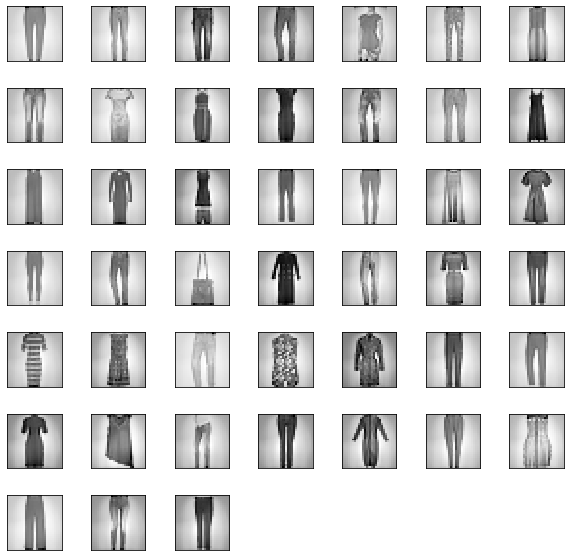



 Predicted label: 9



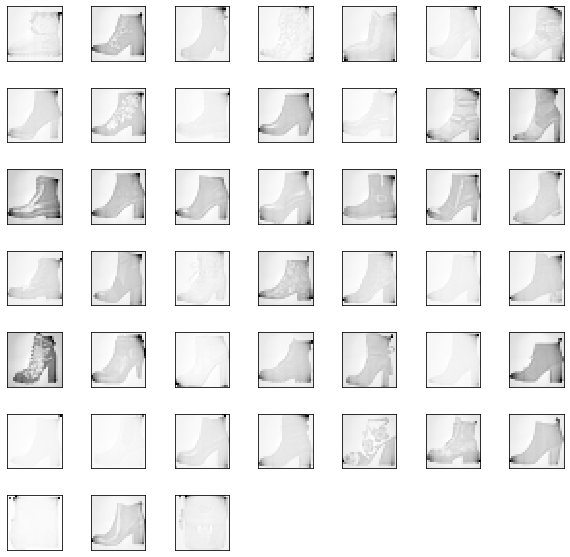

<IPython.core.display.Javascript object>

In [9]:
for label_i in range(num_clusters):
    print(f"===========\n Predicted label: {label_i}\n")
    pred_idx = y_pred == label_i
    xx_pred_label = x[pred_idx]
    plot_fig(45, xx_pred_label)
    print(f"===========\n\n")

### Solution to Q3 

In [10]:
from sklearn.metrics import accuracy_score

<IPython.core.display.Javascript object>

In [11]:
label_map

{0: 'T-shirt/top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle boot'}

<IPython.core.display.Javascript object>

In [12]:
pred_dict_df = pd.DataFrame(y_pred, columns=["Pred"])
pred_dict_df["Pred_Label"] = "" * len(y_pred)
pred_dict_df.head()

,Pred,Pred_Label
0,3,
1,5,
2,7,
3,2,
4,2,


<IPython.core.display.Javascript object>

In [13]:
pred_dict_df.loc[pred_dict_df["Pred"] == 0, "Pred_Label"] = "Sneaker"
pred_dict_df.loc[pred_dict_df["Pred"] == 1, "Pred_Label"] = "Shirt"
pred_dict_df.loc[pred_dict_df["Pred"] == 2, "Pred_Label"] = "T-shirt/top"
pred_dict_df.loc[pred_dict_df["Pred"] == 3, "Pred_Label"] = "Bag"
pred_dict_df.loc[pred_dict_df["Pred"] == 4, "Pred_Label"] = "Dress"
pred_dict_df.loc[pred_dict_df["Pred"] == 5, "Pred_Label"] = "Sandal"
pred_dict_df.loc[pred_dict_df["Pred"] == 6, "Pred_Label"] = "Bag"
pred_dict_df.loc[pred_dict_df["Pred"] == 7, "Pred_Label"] = "Pullover"
pred_dict_df.loc[pred_dict_df["Pred"] == 8, "Pred_Label"] = "Trouser"
pred_dict_df.loc[pred_dict_df["Pred"] == 9, "Pred_Label"] = "Ankle boot"

pred_dict_df.tail()

,Pred,Pred_Label
4995,0,Sneaker
4996,0,Sneaker
4997,4,Dress
4998,8,Trouser
4999,4,Dress


<IPython.core.display.Javascript object>

In [14]:
label_map_new = {}
for k, v in label_map.items():
    label_map_new[v] = k

<IPython.core.display.Javascript object>

In [15]:
pred_dict_df["Pred_New"] = 0
pred_dict_df.head()

,Pred,Pred_Label,Pred_New
0,3,Bag,0
1,5,Sandal,0
2,7,Pullover,0
3,2,T-shirt/top,0
4,2,T-shirt/top,0


<IPython.core.display.Javascript object>

In [16]:
for label in pred_dict_df["Pred_Label"].unique():
    pred_dict_df.loc[pred_dict_df["Pred_Label"] == label, "Pred_New"] = label_map_new[
        label
    ]

<IPython.core.display.Javascript object>

In [17]:
pred_dict_df

,Pred,Pred_Label,Pred_New
0,3,Bag,8
1,5,Sandal,5
2,7,Pullover,2
3,2,T-shirt/top,0
4,2,T-shirt/top,0
...,...,...,...
4995,0,Sneaker,7
4996,0,Sneaker,7
4997,4,Dress,3
4998,8,Trouser,1


<IPython.core.display.Javascript object>

In [18]:
y_pred_new = pred_dict_df["Pred_New"].to_numpy()

accuracy_score(y, y_pred_new)

0.4264

<IPython.core.display.Javascript object>

In [19]:
accuracy_score(y, y_pred_new)

0.4264

<IPython.core.display.Javascript object>

In [20]:
list(label_map.keys())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

<IPython.core.display.Javascript object>

In [21]:
pred_dict_df["Pred_Label"]

0               Bag
1            Sandal
2          Pullover
3       T-shirt/top
4       T-shirt/top
           ...     
4995        Sneaker
4996        Sneaker
4997          Dress
4998        Trouser
4999          Dress
Name: Pred_Label, Length: 5000, dtype: object

<IPython.core.display.Javascript object>

In [22]:
from sklearn.metrics import classification_report

print(
    classification_report(
        y, y_pred_new, target_names=label_map_new.keys(), zero_division=0
    )
)

              precision    recall  f1-score   support

 T-shirt/top       0.48      0.57      0.52       502
     Trouser       0.58      0.89      0.70       500
    Pullover       0.37      0.55      0.44       494
       Dress       0.09      0.11      0.10       514
        Coat       0.00      0.00      0.00       501
      Sandal       0.10      0.08      0.09       489
       Shirt       0.12      0.17      0.14       508
     Sneaker       0.72      0.82      0.77       517
         Bag       0.94      0.78      0.85       481
  Ankle boot       0.86      0.31      0.45       494

    accuracy                           0.43      5000
   macro avg       0.43      0.43      0.41      5000
weighted avg       0.42      0.43      0.41      5000



<IPython.core.display.Javascript object>